# Design Choices
In this notebook, we determine the best ClaSP parameters.

In [1]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../")

from tqdm import tqdm
from itertools import product

Let's load the scores from the different methods.

In [2]:
neighbours = (1, 3, 5)
scores = ("_f1_score", "roc_auc_score")

scores_lookup = {
    "_f1_score" : "F1",
    "roc_auc_score" : "ROC-AUC"
}

methods = [
    (f"{n_neighbours}-NN {scores_lookup[score]}", f"{n_neighbours}-{score}.csv")
    for n_neighbours, score in product(neighbours, scores)
]

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../experiments/parameter/{file_name}")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["name"] = df.name
    df_scores[name] = df.score

In [3]:
df_scores

,name,1-NN F1,1-NN ROC-AUC,3-NN F1,3-NN ROC-AUC,5-NN F1,5-NN ROC-AUC
0,Cane,0.050000,0.015356,0.050000,0.001124,0.005431,0.005805
1,DutchFactory,0.002055,0.002055,0.002055,0.002055,0.002055,0.002055
2,EEGRat,0.002000,0.001500,0.004500,0.001500,0.003500,0.001500
3,EEGRat2,0.136000,0.136000,0.091500,0.091500,0.104000,0.105500
4,Fetal2013,0.000500,0.001889,0.002222,0.001889,0.002222,0.001889
5,GrandMalSeizures,0.000977,0.000977,0.000922,0.000922,0.000922,0.000922
6,GrandMalSeizures2,0.002492,0.002492,0.000767,0.000767,0.033068,0.033068
7,GreatBarbet1,0.004468,0.009149,0.010213,0.008936,0.009149,0.125745
8,GreatBarbet2,0.005745,0.008723,0.007447,0.008723,0.007234,0.007872
9,InsectEPG1,0.011705,0.011705,0.011529,0.001647,0.008705,0.000706


Let's calculate the mean/std error.

In [4]:
for name in df_scores.columns[1:]:
    print(f"{name}: mean_error={np.round(df_scores[name].mean(), 5)}")

1-NN F1: mean_error=0.02998
1-NN ROC-AUC: mean_error=0.03856
3-NN F1: mean_error=0.0139
3-NN ROC-AUC: mean_error=0.01293
5-NN F1: mean_error=0.02143
5-NN ROC-AUC: mean_error=0.03719


In [5]:
for name in df_scores.columns[1:]:
    print(f"{name}: std_error={np.round(df_scores[name].std(), 5)}")

1-NN F1: std_error=0.06207
1-NN ROC-AUC: std_error=0.11366
3-NN F1: std_error=0.02149
3-NN ROC-AUC: std_error=0.02465
5-NN F1: std_error=0.05005
5-NN ROC-AUC: std_error=0.11615


Let's determine and plot the ranks.

In [6]:
ranks = df_scores.rank(1, method = 'min', ascending=True)
means = np.array(ranks.mean(axis=0))

In [7]:
for name in df_scores.columns[1:]:
    print(f"{name}: wins={ranks[ranks[name] == 1].shape[0]}")

1-NN F1: wins=20
1-NN ROC-AUC: wins=30
3-NN F1: wins=37
3-NN ROC-AUC: wins=39
5-NN F1: wins=28
5-NN ROC-AUC: wins=28


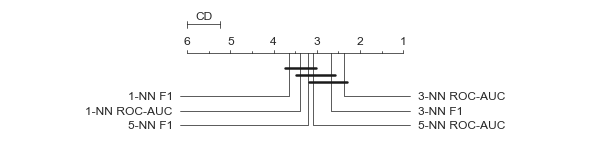

In [8]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, width=8, reverse=True, textspace=2.5)